In [ ]:
# simple code for mnist dataset
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w_h, w_o):
    h = tf.nn.sigmoid(tf.matmul(X, w_h)) # this is a basic mlp, think 2 stacked logistic regressions
    return tf.matmul(h, w_o) # note that we dont take the softmax at the end because our cost fn does that for us

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

In [5]:

X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])

w_h = init_weights([784, 625]) # create symbolic variables
w_o = init_weights([625, 10])

py_x = model(X, w_h, w_o)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y)) # compute costs
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct an optimizer
predict_op = tf.argmax(py_x, 1)

In [ ]:

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()

    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        print(i, np.mean(np.argmax(teY, axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX})))



In [1]:
import tensorflow as tf

In [4]:
matrix1 = tf.constant([[3., 3.]])
# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

In [6]:
product = tf.matmul(matrix1, matrix2)
product

<tf.Tensor 'MatMul_1:0' shape=(1, 1) dtype=float32>

In [7]:
# Launch the default graph.
sess = tf.Session()

# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of three ops in the
# graph: the two constants and matmul.
#
# The output of the op is returned in 'result' as a numpy `ndarray` object.
result = sess.run(product)
print(result)
# ==> [[ 12.]]

# Close the Session when we're done.
sess.close()


[[ 12.]]


In [11]:
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()


[[ 12.]]


In [12]:
with tf.Session() as sess:
  result = sess.run([product])
  print(result)


[array([[ 12.]], dtype=float32)]


In [14]:
with tf.Session() as sess:
  with tf.device("/gpu:1"):
    matrix1 = tf.constant([[3., 3.]])
    matrix2 = tf.constant([[2.],[2.]])
    product = tf.matmul(matrix1, matrix2)
    


In [16]:
with tf.Session("grpc://example.org:2222") as sess:
# Calls to sess.run(...) will be executed on the cluster.
  
    

IndentationError: expected an indented block (<ipython-input-16-017193d5d023>, line 4)

In [21]:
# Enter an interactive TensorFlow Session.
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Initialize 'x' using the run() method of its initializer op.
x.initializer.run()

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = tf.subtract(x, a)
print(sub.eval())
# ==> [-2. -1.]

# Close the Session when we're done.
sess.close()



[-2. -1.]


In [24]:
# Create a Variable, that will be initialized to the scalar value 0.
state = tf.Variable(0, name="counter")

# Create an Op to add one to `state`.

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# Variables must be initialized by running an `init` Op after having
# launched the graph.  We first have to add the `init` Op to the graph.
init_op = tf.initialize_all_variables()

# Launch the graph and run the ops.
with tf.Session() as sess:
  # Run the 'init' op
  sess.run(init_op)
  # Print the initial value of 'state'
  print(sess.run(state))
  # Run the op that updates 'state' and print 'state'.
  for _ in range(3):
    sess.run(update)
    print(sess.run(state))

# output:

# 0
# 1
# 2
# 3



InvalidArgumentError: Cannot assign a device to node 'MatMul_2': Could not satisfy explicit device specification '/device:GPU:1' because no devices matching that specification are registered in this process; available devices: /job:localhost/replica:0/task:0/cpu:0
	 [[Node: MatMul_2 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:1"](Const_4, Const_5)]]

Caused by op u'MatMul_2', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-06527b3e94b2>", line 5, in <module>
    product = tf.matmul(matrix1, matrix2)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1765, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 1454, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Cannot assign a device to node 'MatMul_2': Could not satisfy explicit device specification '/device:GPU:1' because no devices matching that specification are registered in this process; available devices: /job:localhost/replica:0/task:0/cpu:0
	 [[Node: MatMul_2 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:1"](Const_4, Const_5)]]


In [27]:
input1 = tf.constant([3.0])
input2 = tf.constant([2.0])
input3 = tf.constant([5.0])
intermed = tf.add(input2, input3)
mul = tf.matmul(input1, intermed)

with tf.Session() as sess:
  result = sess.run([mul, intermed])
  print(result)

# output:
# [array([ 21.], dtype=float32), array([ 7.], dtype=float32)]


ValueError: Shape must be rank 2 but is rank 1 for 'MatMul_3' (op: 'MatMul') with input shapes: [1], [1].

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w_h, w_o):
    h = tf.nn.sigmoid(tf.matmul(X, w_h)) # this is a basic mlp, think 2 stacked logistic regressions
    return tf.matmul(h, w_o) # note that we dont take the softmax at the end because our cost fn does that for us

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f9bcd0fff10>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f9bcd0ffe90>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f9bcd0ffe50>)

In [9]:
X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])

w_h = init_weights([784, 625]) # create symbolic variables
w_o = init_weights([625, 10])

py_x = model(X, w_h, w_o)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y)) # compute costs
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct an optimizer
predict_op = tf.argmax(py_x, 1)

In [15]:
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()

    for i in range(10):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        print(i, np.mean(np.argmax(teY, axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX})))



(0, 0.69210000000000005)
(1, 0.82420000000000004)
(2, 0.86180000000000001)
(3, 0.88080000000000003)
(4, 0.88929999999999998)
(5, 0.89439999999999997)
(6, 0.89800000000000002)
(7, 0.90059999999999996)
(8, 0.90400000000000003)
(9, 0.90569999999999995)


In [18]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import tensorflow as tf
from tensorflow.python.framework.ops import reset_default_graph

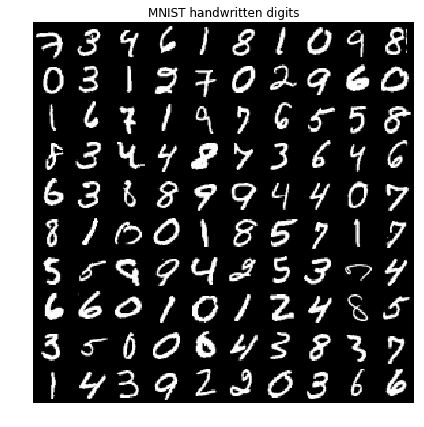

In [36]:
#plot a few MNIST examples
idx = 0
canvas = np.zeros((28*10, 10*28))
for i in range(10):
    for j in range(10):
        canvas[i*28:(i+1)*28, j*28:(j+1)*28] = trX[idx].reshape((28, 28))
        idx += 1
plt.figure(figsize=(7, 7))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

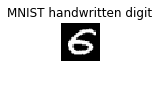

In [35]:
plt.figure(figsize=(0.7, 0.7))
plt.axis('off')
plt.imshow(trX[554].reshape((28, 28)), cmap='gray')
plt.title('MNIST handwritten digit')
plt.show()